# Text analysis with NLTK

NLTK (Natural Language Toolkit) is a popular library for processing big bodies of text in natural\[1] language. It does the job of preparing your texts for further analysis by spliting them into parts or cleaning the "noise" in the text.

\[1]. **Natural Language** is any human language (spoken or written) that was developed for ordinary everyday needs (naturally). This stands in contrast with *constructed* languaes that were developed with a specific intent (like Toki Pona, a minimalist constructed language of only 124 words).

In [1]:
%pip install nltk wordcloud matplotlib pymorphy3 pymorphy3-dicts-ru -q

Note: you may need to restart the kernel to use updated packages.


#### For some functionalities of nltk you will need to install additional packages. 

[More info](https://www.nltk.org/nltk_data)

In [2]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/mike-
[nltk_data]     pech/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mike-pech/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/mike-
[nltk_data]     pech/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mike-pech/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### Let's open our file

In [3]:
with open("./data/text_analysis_ru/san-francisco.txt", "r", encoding="Windows 1251") as file:
    text = file.read()

In [4]:
text

'Спасибо, что скачали книгу в бесплатной электронной библиотеке Royallib.ru: http://royallib.ru\n\nВсе книги автора: http://royallib.ru/author/bunin_ivan.html\n\nЭта же книга в других форматах: http://royallib.ru/book/bunin_ivan/gospodin_iz_sanfrantsisko.html\n\nПриятного чтения!\n\n\n\n\nИван Бунин\n\nГосподин из Сан-Франциско\n\nГоре тебе, Вавилон, город крепкий\n\n\xa0\xa0\xa0\xa0Апокалипсис\n\n\nГосподин из Сан-Франциско – имени его ни в Неаполе, ни на Капри никто не запомнил – ехал в Старый Свет на целых два года, с женой и дочерью, единственно ради развлечения.\n\nОн был твердо уверен, что имеет полное право на отдых, на удовольствие, на путешествие долгое и комфортабельное, и мало ли еще на что. Для такой уверенности у него был тот резон, что, во-первых, он был богат, а во-вторых, только что приступал к жизни, несмотря на свои пятьдесят восемь лет. До этой поры он не жил, а лишь существовал, правда очень недурно, но все же возлагая все надежды на будущее. Он работал не покладая 

#### Tokenize the text

Tokenization process means dividing the whole text into **tokens** — atomic pieces of information. Those can be (but not limited by) words, phrases or sentences. 

By default NLTK uses a `punkt` (or `punkt_tab`) tokenizer that just divides the text using whitespaces and punctuation characters. This makes it uniform for any language (except the ones where word boundaries are not so clear), but may cause some issues with specific tokens like contractions (*mr. Smith* will be two tokens)

In [5]:
tokenized_text = nltk.word_tokenize(text)

In [6]:
# Cut off the header we will not use in the analysis
tokenized_text = tokenized_text[tokenized_text.index("Сан-Франциско")+1:]
tokenized_text

['Горе',
 'тебе',
 ',',
 'Вавилон',
 ',',
 'город',
 'крепкий',
 'Апокалипсис',
 'Господин',
 'из',
 'Сан-Франциско',
 '–',
 'имени',
 'его',
 'ни',
 'в',
 'Неаполе',
 ',',
 'ни',
 'на',
 'Капри',
 'никто',
 'не',
 'запомнил',
 '–',
 'ехал',
 'в',
 'Старый',
 'Свет',
 'на',
 'целых',
 'два',
 'года',
 ',',
 'с',
 'женой',
 'и',
 'дочерью',
 ',',
 'единственно',
 'ради',
 'развлечения',
 '.',
 'Он',
 'был',
 'твердо',
 'уверен',
 ',',
 'что',
 'имеет',
 'полное',
 'право',
 'на',
 'отдых',
 ',',
 'на',
 'удовольствие',
 ',',
 'на',
 'путешествие',
 'долгое',
 'и',
 'комфортабельное',
 ',',
 'и',
 'мало',
 'ли',
 'еще',
 'на',
 'что',
 '.',
 'Для',
 'такой',
 'уверенности',
 'у',
 'него',
 'был',
 'тот',
 'резон',
 ',',
 'что',
 ',',
 'во-первых',
 ',',
 'он',
 'был',
 'богат',
 ',',
 'а',
 'во-вторых',
 ',',
 'только',
 'что',
 'приступал',
 'к',
 'жизни',
 ',',
 'несмотря',
 'на',
 'свои',
 'пятьдесят',
 'восемь',
 'лет',
 '.',
 'До',
 'этой',
 'поры',
 'он',
 'не',
 'жил',
 ',',
 'а',

#### Cleaning the tokenized corpus

Before our analysis begins, we must convert all words to lowercase (for ease of counting) and clean the text from "stopwords" — commonly used words that give little to no context to the sentence.

> Examples: the, a, an, on, in, for, our, me, from etc.

In [7]:
from nltk.corpus import stopwords
                      # Stopwords dictionary depends on the language you're using
text_filtered = [word.lower() for word in tokenized_text 
                    if word.lower() not in stopwords.words("russian")]
text_filtered

['горе',
 'тебе',
 ',',
 'вавилон',
 ',',
 'город',
 'крепкий',
 'апокалипсис',
 'господин',
 'сан-франциско',
 '–',
 'имени',
 'неаполе',
 ',',
 'капри',
 'никто',
 'запомнил',
 '–',
 'ехал',
 'старый',
 'свет',
 'целых',
 'года',
 ',',
 'женой',
 'дочерью',
 ',',
 'единственно',
 'ради',
 'развлечения',
 '.',
 'твердо',
 'уверен',
 ',',
 'имеет',
 'полное',
 'право',
 'отдых',
 ',',
 'удовольствие',
 ',',
 'путешествие',
 'долгое',
 'комфортабельное',
 ',',
 'мало',
 '.',
 'уверенности',
 'резон',
 ',',
 ',',
 'во-первых',
 ',',
 'богат',
 ',',
 'во-вторых',
 ',',
 'приступал',
 'жизни',
 ',',
 'несмотря',
 'свои',
 'пятьдесят',
 'восемь',
 'лет',
 '.',
 'поры',
 'жил',
 ',',
 'лишь',
 'существовал',
 ',',
 'правда',
 'очень',
 'недурно',
 ',',
 'возлагая',
 'надежды',
 'будущее',
 '.',
 'работал',
 'покладая',
 'рук',
 ',',
 '–',
 'китайцы',
 ',',
 'которых',
 'выписывал',
 'работы',
 'целыми',
 'тысячами',
 ',',
 'знали',
 ',',
 'это',
 'значит',
 '!',
 '–',
 ',',
 ',',
 'увидел',


#### Not quite — we still need to filter out punctuation

In [8]:
text_filtered = [word for word in text_filtered 
                    if word.isalpha()]     # isalpha() stands for "is alphanumeric"
text_filtered

['горе',
 'тебе',
 'вавилон',
 'город',
 'крепкий',
 'апокалипсис',
 'господин',
 'имени',
 'неаполе',
 'капри',
 'никто',
 'запомнил',
 'ехал',
 'старый',
 'свет',
 'целых',
 'года',
 'женой',
 'дочерью',
 'единственно',
 'ради',
 'развлечения',
 'твердо',
 'уверен',
 'имеет',
 'полное',
 'право',
 'отдых',
 'удовольствие',
 'путешествие',
 'долгое',
 'комфортабельное',
 'мало',
 'уверенности',
 'резон',
 'богат',
 'приступал',
 'жизни',
 'несмотря',
 'свои',
 'пятьдесят',
 'восемь',
 'лет',
 'поры',
 'жил',
 'лишь',
 'существовал',
 'правда',
 'очень',
 'недурно',
 'возлагая',
 'надежды',
 'будущее',
 'работал',
 'покладая',
 'рук',
 'китайцы',
 'которых',
 'выписывал',
 'работы',
 'целыми',
 'тысячами',
 'знали',
 'это',
 'значит',
 'увидел',
 'сделано',
 'сравнялся',
 'теми',
 'кого',
 'некогда',
 'взял',
 'образец',
 'решил',
 'передохнуть',
 'люди',
 'которым',
 'принадлежал',
 'имели',
 'обычай',
 'начинать',
 'наслаждения',
 'жизнью',
 'поездки',
 'европу',
 'индию',
 'египет',

In [9]:
stop = stopwords.words("russian")

# And this dicitonary is just a list, so you can add more stopwords if you wish
stop.append(["это", "этот", "этих"])
                      
text_filtered = [word.lower() for word in text_filtered 
                    if word.lower() not in stop]
text_filtered

['горе',
 'тебе',
 'вавилон',
 'город',
 'крепкий',
 'апокалипсис',
 'господин',
 'имени',
 'неаполе',
 'капри',
 'никто',
 'запомнил',
 'ехал',
 'старый',
 'свет',
 'целых',
 'года',
 'женой',
 'дочерью',
 'единственно',
 'ради',
 'развлечения',
 'твердо',
 'уверен',
 'имеет',
 'полное',
 'право',
 'отдых',
 'удовольствие',
 'путешествие',
 'долгое',
 'комфортабельное',
 'мало',
 'уверенности',
 'резон',
 'богат',
 'приступал',
 'жизни',
 'несмотря',
 'свои',
 'пятьдесят',
 'восемь',
 'лет',
 'поры',
 'жил',
 'лишь',
 'существовал',
 'правда',
 'очень',
 'недурно',
 'возлагая',
 'надежды',
 'будущее',
 'работал',
 'покладая',
 'рук',
 'китайцы',
 'которых',
 'выписывал',
 'работы',
 'целыми',
 'тысячами',
 'знали',
 'это',
 'значит',
 'увидел',
 'сделано',
 'сравнялся',
 'теми',
 'кого',
 'некогда',
 'взял',
 'образец',
 'решил',
 'передохнуть',
 'люди',
 'которым',
 'принадлежал',
 'имели',
 'обычай',
 'начинать',
 'наслаждения',
 'жизнью',
 'поездки',
 'европу',
 'индию',
 'египет',

## Text analysis part

First off, **wordcloud** — a very intuitive format of data representation that scatters words depending on their frequency in the text.

Requires the text as a whole single string, so we join it using `" ".join(text)`

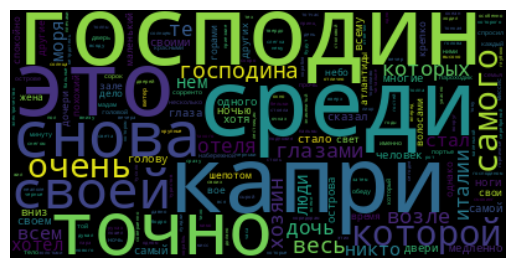

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud_doc = WordCloud().generate(" ".join(text_filtered))

# Technical settings
plt.imshow(wordcloud_doc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Analyzing morphs with pymorphy

`pymorphy3` is a powerful library for morphological analysis that can analyses a given word and returns a list of its properties

In [11]:
import pymorphy3
ru_morph = pymorphy3.MorphAnalyzer(lang="ru")

ru_morph.parse("господин")

[Parse(word='господин', tag=OpencorporaTag('NOUN,anim,masc sing,nomn'), normal_form='господин', score=1.0, methods_stack=((DictionaryAnalyzer(), 'господин', 1257, 0),))]

##### ...or rather a list of several different parses of various meanings of the word

In [12]:
ru_morph.parse("точно")

[Parse(word='точно', tag=OpencorporaTag('ADVB'), normal_form='точно', score=0.5, methods_stack=((DictionaryAnalyzer(), 'точно', 3, 0),)),
 Parse(word='точно', tag=OpencorporaTag('CONJ'), normal_form='точно', score=0.25, methods_stack=((DictionaryAnalyzer(), 'точно', 20, 0),)),
 Parse(word='точно', tag=OpencorporaTag('ADJS,Qual neut,sing'), normal_form='точный', score=0.25, methods_stack=((DictionaryAnalyzer(), 'точно', 223, 56),))]

#### Like this we can make a chart with the quantity of various parts of speech

Short names of parts of speech are listed [here](https://pymorphy2.readthedocs.io/en/stable/user/grammemes.html#grammeme-docs)

In [13]:
parts_of_speech = {}     # Empty dictionary for part of speech counts

for word in text_filtered:
    pos = ru_morph.parse(word)[0].tag.POS    # Analyse

    if pos not in parts_of_speech.keys():    # Create a record if there was none
        parts_of_speech.update({pos: 0})
    else:
        parts_of_speech[pos] += 1            # Increment a record if exists

parts_of_speech.pop(None)                    # Delete the untagged word counts
parts_of_speech

{'NOUN': 1738,
 'NPRO': 28,
 'ADJF': 933,
 'VERB': 550,
 'ADVB': 322,
 'PREP': 42,
 'ADJS': 54,
 'NUMR': 21,
 'PRCL': 24,
 'GRND': 92,
 'CONJ': 13,
 'PRTS': 15,
 'INFN': 70,
 'PRED': 1,
 'PRTF': 185,
 'INTJ': 1,
 'COMP': 11}

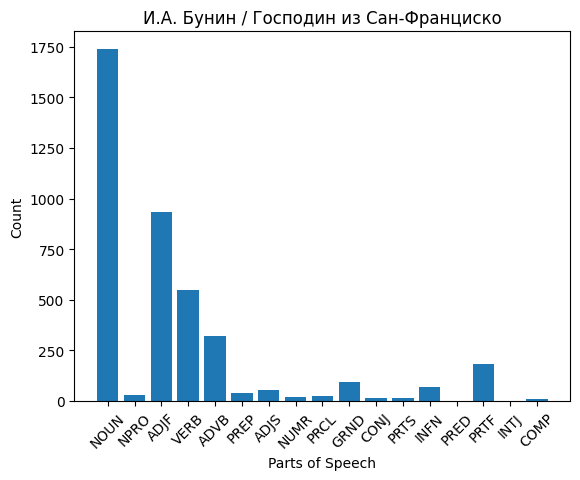

In [14]:
fig, ax = plt.subplots()

ax.bar(
    parts_of_speech.keys(),
    parts_of_speech.values(), 
)

ax.set_xlabel("Parts of Speech")
ax.set_ylabel("Count")
ax.set_title("И.А. Бунин / Господин из Сан-Франциско")
ax.tick_params(axis='x', labelrotation=45)

In [19]:
def preprocess(whole_text: str, ex_stopwords: list[str] = []) -> list[str]:
    tokenized_text = nltk.word_tokenize(whole_text)

    stop = stopwords.words("russian")
    stop.extend(ex_stopwords)    # Initializing stopwords and appending extra if provided

    filtered_text = [word.lower() for word in tokenized_text 
                    if word.lower() not in stop and word.isalpha()]

    return filtered_text

In [24]:
books = {
    "Alleyways": "./data/text_analysis_ru/alleys.txt", 
    "San-Francisco": "./data/text_analysis_ru/san-francisco.txt",
}

# books.items() returns an iterable of tuples [("key": "value"), ...] which we unpack into two variables here
for book, path in books.items():         
    with open(path, "r", encoding="Windows 1251") as file:
           books.update(
               {
                   book: preprocess(file.read())
               }
           )

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

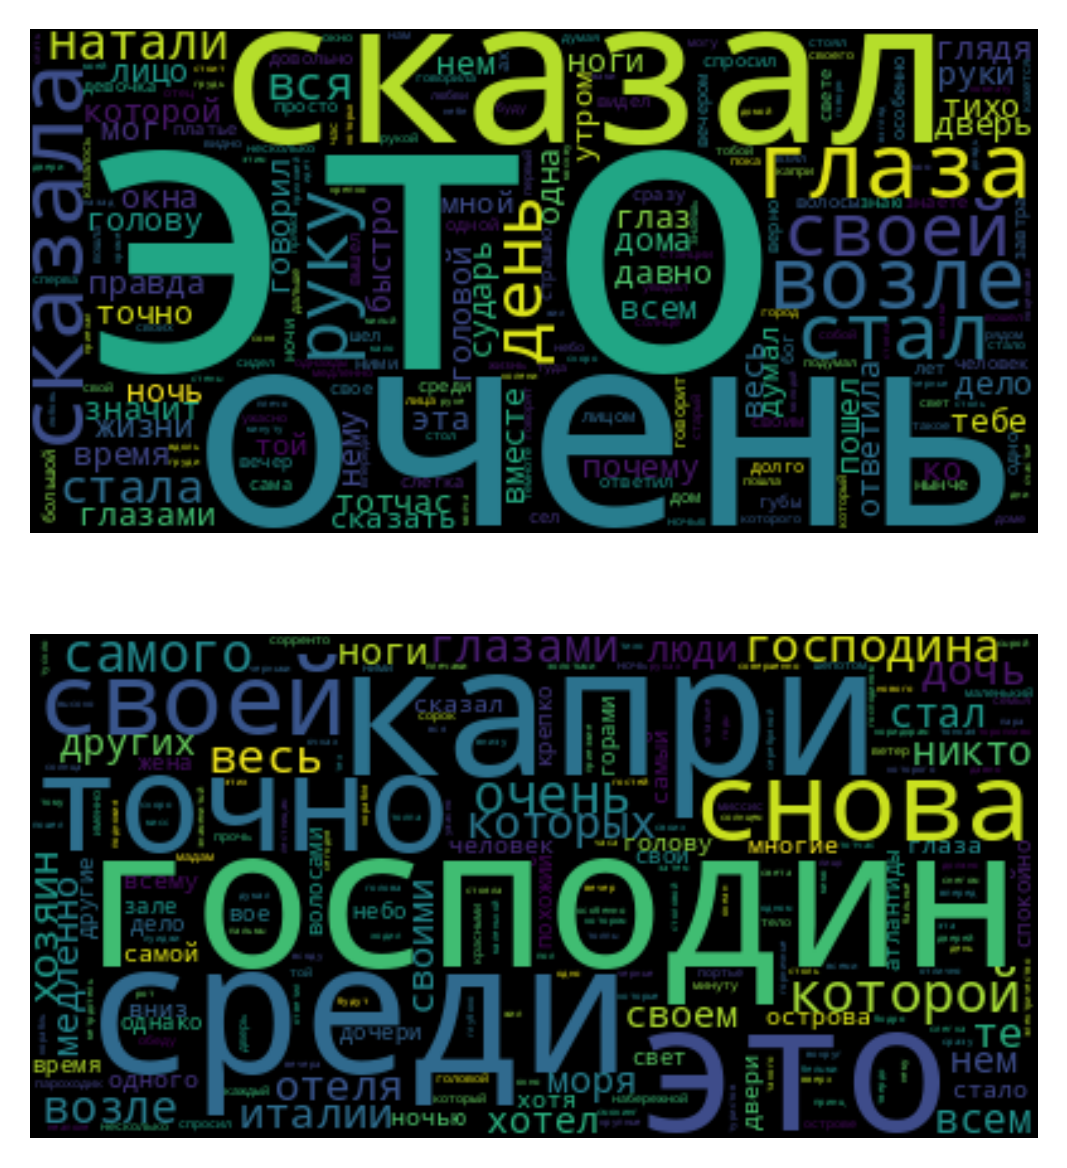

In [25]:
fig, axs = plt.subplots(2, 1)
fig.dpi = 300     # Increase the resolution of the figure

axs[0].imshow(
    WordCloud().generate(" ".join(books["Alleyways"])),
    interpolation='bilinear'
)
axs[1].imshow(
    WordCloud().generate(" ".join(books["San-Francisco"])),
    interpolation='bilinear'
)

axs[0].axis("off")
axs[1].axis("off")

In [31]:
import pymorphy3
ru_morph = pymorphy3.MorphAnalyzer(lang="ru")

def pos_counter(text: list) -> dict[str: str]:
    parts_of_speech = {}     # Empty dictionary for part of speech counts

    pos_list = [ru_morph.parse(word)[0].tag.POS for word in text]  # Analyse

    for pos in pos_list:

        if pos not in parts_of_speech.keys():    # Create a record if there was none
            parts_of_speech.update({pos: 0})
        else:
            parts_of_speech[pos] += 1            # Increment a record if exists

    parts_of_speech.pop(None)                    # Remove somehow produced None part of speech
    return parts_of_speech

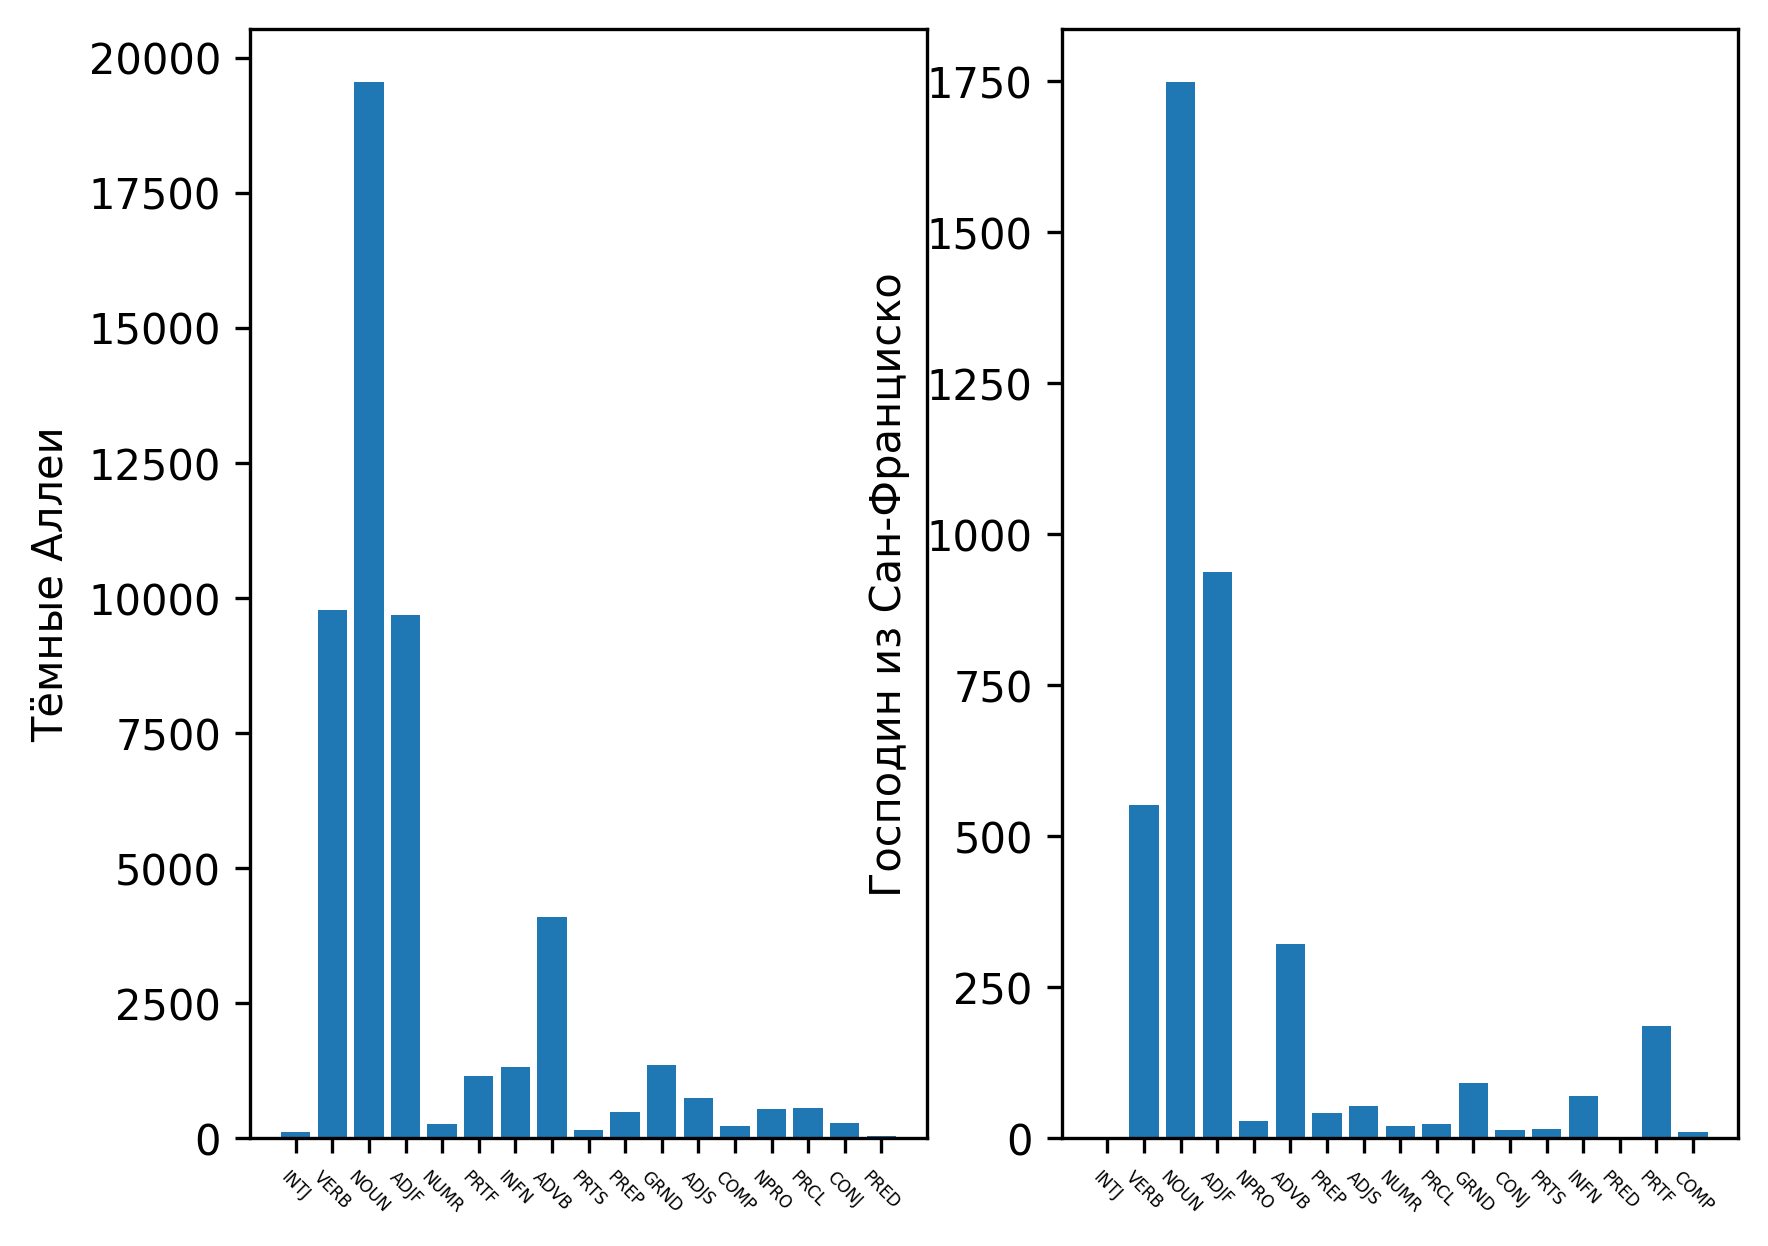

In [32]:
fig, axs = plt.subplots(1, 2)
fig.dpi = 300

axs[0].bar(
    pos_counter(books["Alleyways"]).keys(),
    pos_counter(books["Alleyways"]).values(), 
)
axs[1].bar(
    pos_counter(books["San-Francisco"]).keys(),
    pos_counter(books["San-Francisco"]).values(), 
)

axs[0].set_ylabel("Тёмные Аллеи")
axs[1].set_ylabel("Господин из Сан-Франциско")

axs[0].tick_params(axis='x', labelrotation=-45, labelsize=4)
axs[1].tick_params(axis='x', labelrotation=-45, labelsize=4)

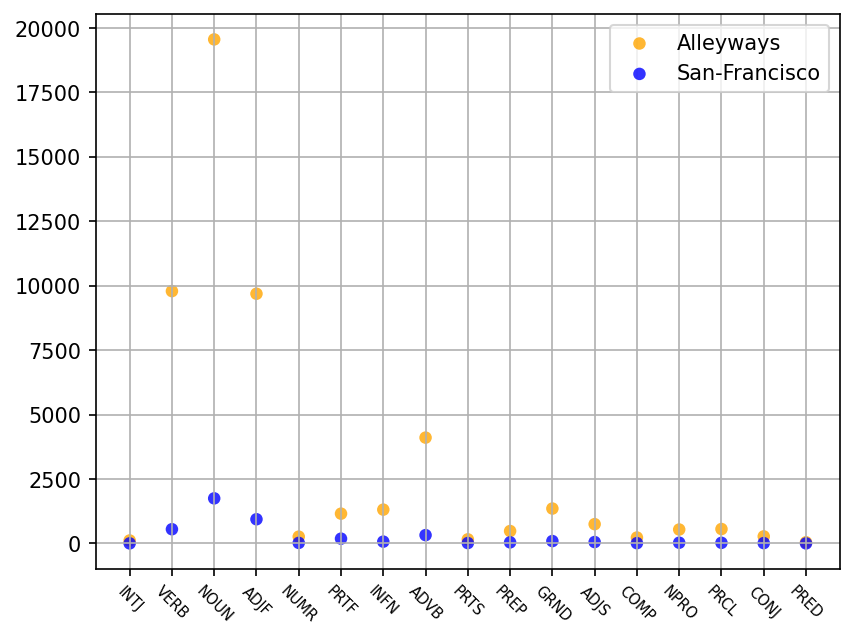

In [33]:
fig, ax = plt.subplots()
fig.dpi = 150
colors = ["orange", "blue"]

    # enumerate returns an iterator of tuples [(index, value), ...]
for i, (title, text) in enumerate(books.items()):
    ax.scatter(
        pos_counter(text).keys(),
        pos_counter(text).values(), 
        c=colors[i],
        alpha=0.8,
        label=title,
        edgecolors="none",
    )

ax.legend()
ax.grid(True)

ax.tick_params(axis='x', labelrotation=-45, labelsize=7)